In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

np.random.seed(29)


In [2]:
# Scales each feature to lie in [0, 1] and separate the data into training and
# test sets.

def preprocess_data(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    return [X_train, X_test, y_train, y_test]
    

In [77]:
dataset_names = ['wdbc', 'arrhythmia', 'darwin']
dataset_arrays = []

wdbc_data = pd.read_csv('./breast+cancer+wisconsin+diagnostic/wdbc.data', header=None).to_numpy()
wdbc_X = wdbc_data[:, 2:31]
wdbc_y = wdbc_data[:, 1]
wdbc_processed_data = preprocess_data(wdbc_X, wdbc_y)
dataset_arrays.append(wdbc_processed_data)


arrythmia_data = pd.read_csv('./arrhythmia/arrhythmia.data', header=None).replace('?', np.nan).to_numpy()
# Fills in missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
arrythmia_data = imputer.fit_transform(arrythmia_data)
arrythmia_X = arrythmia_data[:, 0:278]
arrythmia_y = arrythmia_data[:, 279]
arrythmia_processed_data = preprocess_data(arrythmia_X, arrythmia_y)
dataset_arrays.append(arrythmia_processed_data)

# Returns the dataset with given name with x_train, X_test, y_train, y_test
def get_dataset_split(name):
    i = dataset_names.index(name)
    cur_dataset =  dataset_arrays[i]
    return cur_dataset[0], cur_dataset[1], cur_dataset[2], cur_dataset[3]

In [36]:
print(wdbc_X)
print(type(wdbc_X))
print(np.shape(wdbc_X))
print(wdbc_y)
print(type(wdbc_y))

[[17.99 10.38 122.8 ... 0.7119 0.2654 0.4601]
 [20.57 17.77 132.9 ... 0.2416 0.186 0.275]
 [19.69 21.25 130.0 ... 0.4504 0.243 0.3613]
 ...
 [16.6 28.08 108.3 ... 0.3403 0.1418 0.2218]
 [20.6 29.33 140.1 ... 0.9387 0.265 0.4087]
 [7.76 24.54 47.92 ... 0.0 0.0 0.2871]]
<class 'numpy.ndarray'>
(569, 29)
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M'

## [DARWIN dataset exploration](https://archive.ics.uci.edu/dataset/732/darwin)

### Read in the dataset and get the y values/class labels

In [6]:
darwin_data = pd.read_csv('./DARWIN/DARWIN.csv', header=0)
#Get y data
darwin_y = np.array(darwin_data.iloc[:,len(darwin_data.columns)-1])
print(len(darwin_y))
print(f"{type(darwin_y)}\n{darwin_y}")

174
<class 'numpy.ndarray'>
['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']


In [58]:
print(len(darwin_data.columns))

452


### X data features

In [8]:
darwin_X = np.array(darwin_data.iloc[:,1:len(darwin_data.columns)-1]) #Last column is the class label
print(f"{type(darwin_X)}\n{darwin_X}")
print(darwin_X.shape)

<class 'numpy.ndarray'>
[[5.16000000e+03 1.25000000e-05 1.20804174e+02 ... 1.74927817e+03
  2.96102768e+05 1.44605000e+05]
 [5.19800000e+04 1.60000000e-05 1.15318238e+02 ... 1.50476827e+03
  2.78744285e+05 2.98640000e+05]
 [2.60000000e+03 1.03000000e-05 2.29933997e+02 ... 1.43144349e+03
  1.44411706e+05 7.90250000e+04]
 ...
 [3.83000000e+03 8.36000000e-06 1.51536989e+02 ... 1.91557349e+03
  1.28727124e+05 8.34450000e+04]
 [1.76000000e+03 7.96000000e-06 2.89518195e+02 ... 1.91557349e+03
  1.28727124e+05 8.34450000e+04]
 [2.87500000e+03 8.18000000e-06 2.35769350e+02 ... 1.91557349e+03
  1.28727124e+05 8.34450000e+04]]
(174, 450)


### Split the data into training and test sets

In [9]:
darwin_data_split = preprocess_data(darwin_X, darwin_y)
darwin_data_x_train = darwin_data_split[0]
darwin_data_x_test = darwin_data_split[1]
darwin_data_y_train = darwin_data_split[2]
darwin_data_y_test = darwin_data_split[3]

In [66]:
dataset_arrays.append(darwin_data_split)

### Reduce dimensions of X data

In [22]:
from sklearn.decomposition import PCA
darwin_pca = PCA(n_components=2)
darwin_x_reduced = darwin_pca.fit_transform(darwin_X)

### Plot the Y data vs X data

/var/folders/0v/by4ynxc539g16znlqfb2217h0000gq/T/ipykernel_92498/3929674849.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(darwin_x_reduced[idx, 0], darwin_x_reduced[idx, 1], c=color, label=label_encoder.classes_[c], marker=marker, edgecolor='k', alpha=0.7)


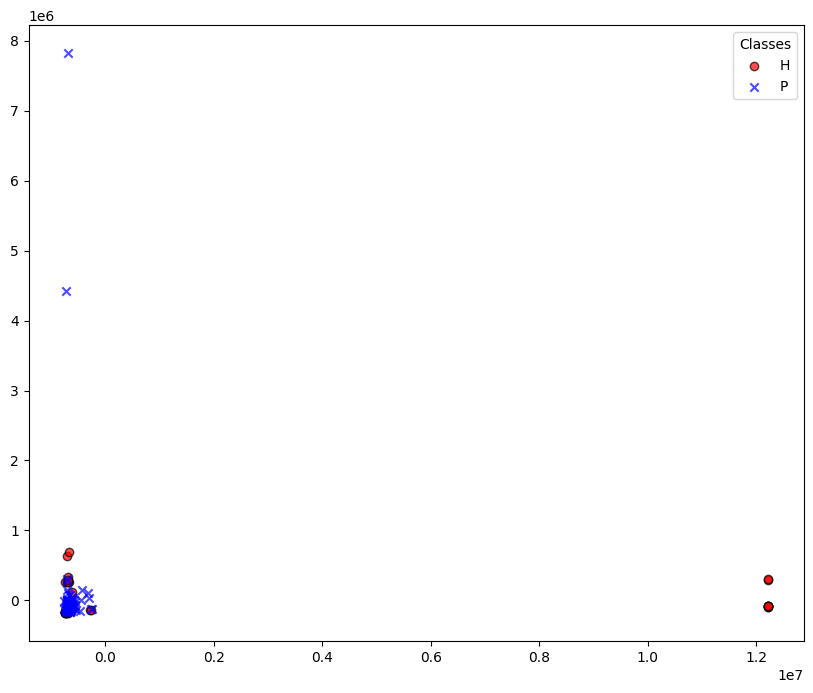

In [34]:
#Encode the label data 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
darwin_y_encoded = label_encoder.fit_transform(darwin_y)
plt.figure(figsize=(10,8))

darwin_classes = np.unique(darwin_y_encoded)
colors = ['red', 'blue']
markers = ['o', 'x']

for c, color, marker in zip(darwin_classes, colors, markers):
    idx = np.where(darwin_y_encoded == c)
    plt.scatter(darwin_x_reduced[idx, 0], darwin_x_reduced[idx, 1], c=color, label=label_encoder.classes_[c], marker=marker, edgecolor='k', alpha=0.7)

plt.legend(title="Classes")
plt.show()

## Helper Functions to 
- train and evaluate a model using Bagging Classifier ontop of logistic regression
- Plot accuracy curves vs number of estimators
- Plot accuracy curves vs number of max_samples (fraction of)
- Plot accuracy curves vs C regularization parameter (inverse of regularization strength)

In [67]:
#Reduce dimensionality of dataset to visualize
def reduce_dimensions(X_data):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X_data)
    return X_reduced

def plot_data(X_data_reduced,Y_data, y_to_string_label=None):
    plt.figure(figsize=(12,8))
    if Y_data.dtype == 'object' or y_to_string_label != None:
        label_encoder = LabelEncoder()
        if y_to_string_label != None:
            labels = [y_to_string_label[val] for val in Y_data]
            y_encoded = label_encoder.fit_transform(labels)
            scatter = plt.scatter(X_data_reduced[:, 0], X_data_reduced[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
            
            class_labels = label_encoder.classes_
            handles, _ = scatter.legend_elements(prop='colors')
            legend = plt.legend(handles, class_labels, title="Class Labels")
            plt.tight_layout(rect=[0,0,0.85,1])
        else:
            y_encoded = label_encoder.fit_transform(Y_data)
            classes = np.unique(y_encoded)
            colors = ['red', 'blue']
            markers = ['o', 'x']
            for c, color, marker in zip(classes, colors, markers):
                idx = np.where(y_encoded == c)
                plt.scatter(X_data_reduced[idx, 0], X_data_reduced[idx, 1], c=color, label=label_encoder.classes_[c], marker=marker, edgecolor='k', alpha=0.7)
            plt.legend(title="Classes")
    else:
        scatter = plt.scatter(X_data_reduced[:, 0], X_data_reduced[:, 1], c=Y_data, edgecolor='k', alpha=0.7)
        cbar = plt.colorbar(scatter)
    plt.show()

In [10]:
# Trains bagging model on top of logistic regression.
def bagging_log_regr(X_train, X_test, y_train, y_test, num_models, frac_samples, regularization=None):
    if (regularization == None):
        base = LogisticRegression(penalty=None, max_iter=5000)
    else:
        base = LogisticRegression(penalty='l2', C=regularization, max_iter=5000)
    bagging_classifier = BaggingClassifier(estimator=base, 
                                           n_estimators=num_models, 
                                           max_samples=frac_samples)
    bagging_classifier.fit(X_train, y_train)
    return bagging_classifier.score(X_train, y_train), bagging_classifier.score(X_test, y_test)

# Plots training and testing accuracy vs. number of base learners.
def plot_acc_vs_n_models(list_n_models, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc):
    plt.plot(list_n_models, list_tr_acc, label='Train')
    plt.plot(list_n_models, list_te_acc, label='Test')
    nobag_tr = np.full(len(list_n_models), nobag_tr_acc)
    nobag_te = np.full(len(list_n_models), nobag_te_acc)
    plt.plot(list_n_models, nobag_tr, label='Train without bagging')
    plt.plot(list_n_models, nobag_te, label='Test without bagging')
    plt.legend(loc='best')
    plt.show()
    

In [11]:
# Plots training and test accuracies vs number of examples used to train each base learners.
def plot_acc_vs_n_examples(list_n_examples, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc):
    plt.plot(list_n_examples, list_tr_acc, label='Train')
    plt.plot(list_n_examples, list_te_acc, label='Test')
    nobag_tr = np.full(len(list_n_examples), nobag_tr_acc)
    nobag_te = np.full(len(list_n_examples), nobag_te_acc)
    plt.plot(list_n_examples, nobag_tr, label='Train without bagging')
    plt.plot(list_n_examples, nobag_te, label='Test without bagging')
    plt.legend(loc='best')
    plt.show()

In [12]:
# Plots training and test accuracies vs C (inverse of regularization strength)
def plot_acc_vs_C(list_C, list_tr_acc, list_te_acc, list_nobag_tr_acc, list_nobag_te_acc):
    plt.plot(list_C, list_tr_acc, label='Train w/ bagging')
    plt.plot(list_C, list_te_acc, label='Test w/ bagging')
    plt.plot(list_C, list_nobag_tr_acc, label='Train w/o bagging')
    plt.plot(list_C, list_nobag_te_acc, label='Test w/o bagging')
    plt.legend(loc='best')
    plt.show()

## List of Hyperparameters to tune/test for each experiment

In [13]:
list_n_models = [1, 5, 10, 20, 50, 100, 200] #Number of base learners
list_n_examples = [0.1, 0.3, 0.5, 0.7, 0.9] #Fractional max_samples
list_C = [0.1, 0.5, 1, 5, 10, 50, 100, 500] #Regularization parameter

## WDBC Dataset Experiments

### Visualize dataset

In [53]:
print(wdbc_y.dtype)
print(wdbc_y[-5:])

object
['M' 'M' 'M' 'M' 'B']


In [61]:
print(np.unique(wdbc_y))

['B' 'M']


/var/folders/0v/by4ynxc539g16znlqfb2217h0000gq/T/ipykernel_92498/1885225419.py:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_data_reduced[idx, 0], X_data_reduced[idx, 1], c=color, label=label_encoder.classes_[c], marker=marker, edgecolor='k', alpha=0.7)


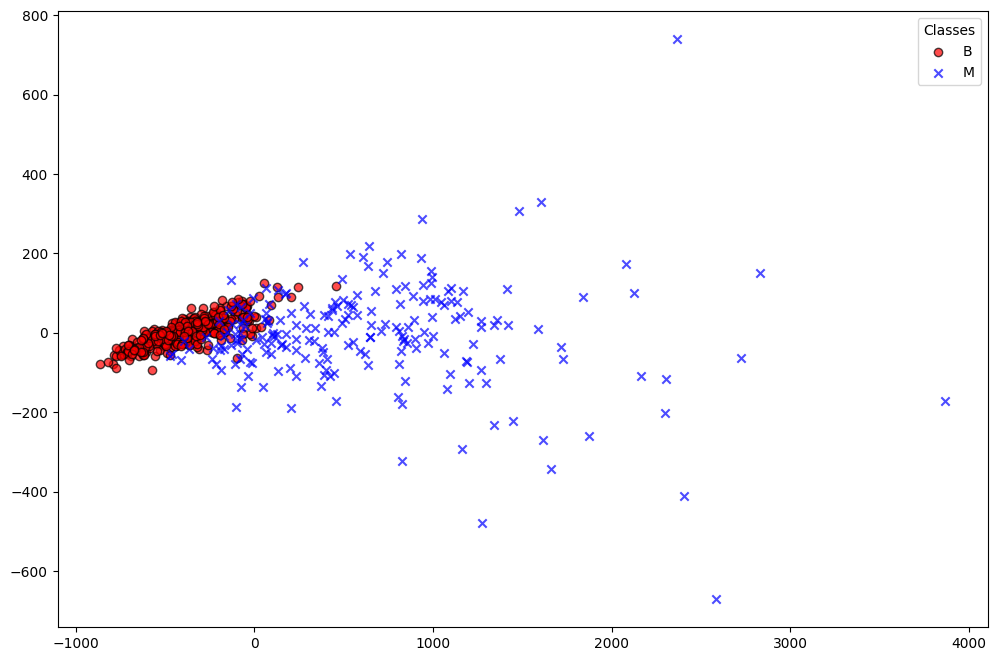

In [69]:
wdbc_reduced = reduce_dimensions(wdbc_X)
plot_data(X_data_reduced=wdbc_reduced, Y_data=wdbc_y)

### Base learners (n_estimators)

In [158]:
wdbc_X_train, wdbc_X_test, wdbc_y_train, wdbc_y_test = get_dataset_split('wdbc')

print(np.shape(wdbc_X_train))
print(np.shape(wdbc_X_test))

(483, 29)
(86, 29)


1.0
0.9534883720930233
[0.9813664596273292, 0.989648033126294, 0.9917184265010351, 0.9917184265010351, 0.989648033126294, 0.9937888198757764, 0.9937888198757764]
[0.9418604651162791, 0.9534883720930233, 0.9767441860465116, 0.9651162790697675, 0.9767441860465116, 0.9767441860465116, 0.9767441860465116]


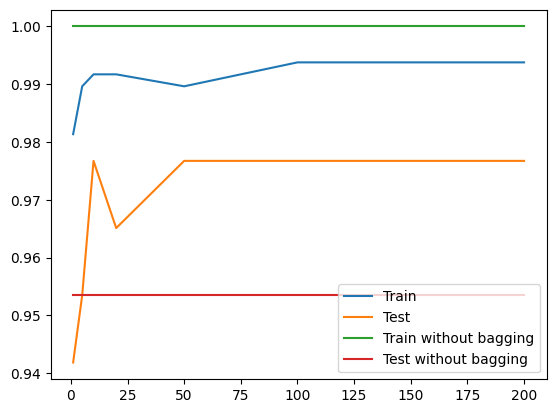

In [159]:
# Test on number of base learners

X_train, X_test, y_train, y_test = get_dataset_split('wdbc')

log_regr = LogisticRegression(penalty=None, max_iter=5000)
log_regr.fit(X_train, y_train)
nobag_tr_acc = log_regr.score(X_train, y_train)
nobag_te_acc = log_regr.score(X_test, y_test)
print(nobag_tr_acc)
print(nobag_te_acc)


list_tr_acc = []
list_te_acc = []
for n_models in list_n_models:
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, n_models, 0.5)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_n_models(list_n_models, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc)

### Fraction of examples used to train each base learners

['B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B

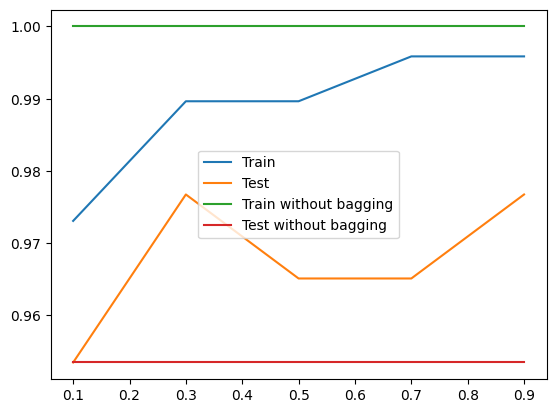

In [160]:
# Test on fraction of examples used to train each base learners

X_train, X_test, y_train, y_test = get_dataset_split('wdbc')
print(y_train)

log_regr = LogisticRegression(penalty=None, max_iter=5000)
log_regr.fit(X_train, y_train)
nobag_tr_acc = log_regr.score(X_train, y_train)
nobag_te_acc = log_regr.score(X_test, y_test)
print(nobag_tr_acc)
print(nobag_te_acc)


list_tr_acc = []
list_te_acc = []
for n_examples in list_n_examples:
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, 10, n_examples)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_n_examples(list_n_examples, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc)

### Regularization (C) parameter

[0.937888198757764, 0.9627329192546584, 0.9710144927536232, 0.9834368530020704, 0.9834368530020704, 0.9917184265010351, 0.9917184265010351, 0.9917184265010351]
[0.9534883720930233, 0.9534883720930233, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675]
[0.9192546583850931, 0.94824016563147, 0.9544513457556936, 0.9813664596273292, 0.9813664596273292, 0.9875776397515528, 0.9834368530020704, 0.9875776397515528]
[0.9418604651162791, 0.9534883720930233, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9534883720930233, 0.9767441860465116]


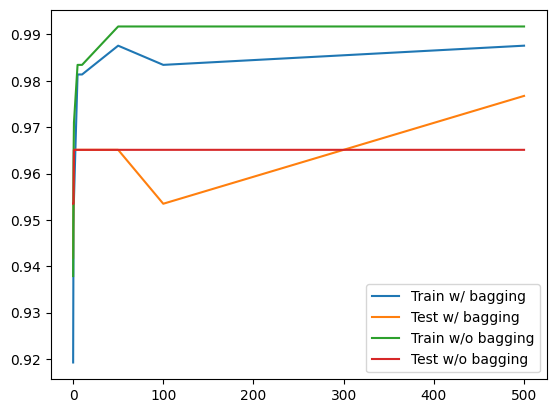

In [162]:
# Test on C

list_C = [0.1, 0.5, 1, 5, 10, 50, 100, 500]

X_train, X_test, y_train, y_test = get_dataset_split('wdbc')

list_nobag_tr_acc = []
list_nobag_te_acc = []
list_tr_acc = []
list_te_acc = []
for C in list_C:
    log_regr = LogisticRegression(penalty='l2', C=C, max_iter=5000)
    log_regr.fit(X_train, y_train)
    list_nobag_tr_acc.append(log_regr.score(X_train, y_train))
    list_nobag_te_acc.append(log_regr.score(X_test, y_test))
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, 10, 0.5, regularization=C)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_nobag_tr_acc)
print(list_nobag_te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_C(list_C, list_tr_acc, list_te_acc, list_nobag_tr_acc, list_nobag_te_acc)

### K-NN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
N_neighbors = [1,2,5,10,15,25,50]

knn_wdbc = KNeighborsClassifier(n_neighbors=20)
knn_wdbc = knn_wdbc.fit(wdbc_X_train, wdbc_y_train)

In [156]:
print("X test prediction:", knn_wdbc.predict(wdbc_X_test))
print("Accuracy on train data:",knn_wdbc.score(wdbc_X_train, wdbc_y_train))
print("Accuracy on test data:",knn_wdbc.score(wdbc_X_test, wdbc_y_test))

X test prediction: ['M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B']
Accuracy on train data: 0.9648033126293996
Accuracy on test data: 0.9651162790697675


In [157]:
bagging_knn = BaggingClassifier(estimator=knn_wdbc, n_estimators=10, max_samples=60)
bagging_knn.fit(wdbc_X_train, wdbc_y_train)
print("Training accuracy of bagging kNN:",bagging_knn.score(wdbc_X_train, wdbc_y_train))
print("Test accuracy of bagging kNN", bagging_knn.score(wdbc_X_test, wdbc_y_test))


Training accuracy of bagging kNN: 0.917184265010352
Test accuracy of bagging kNN 0.8953488372093024


## Arrhythmia Dataset Experiments

In [54]:
print(arrythmia_y)
print(arrythmia_y.dtype)

[ 8.  6. 10.  1.  7. 14.  1.  1.  1. 10.  3.  1. 10.  6.  1.  1. 10.  1.
  1.  1.  1.  1.  1.  1.  1. 16. 14. 10.  2.  2.  6.  1.  1.  1.  4.  1.
  1. 10.  1.  6.  1.  1.  1.  1.  1.  4.  5.  1.  6.  1.  1.  1. 10. 16.
 16.  6.  1.  1.  6.  1.  5.  5.  1.  1.  1.  1.  2.  1.  6.  1.  6. 16.
  1.  1.  1. 10.  3.  2.  1.  1.  1.  1.  2.  4.  6.  9.  2.  4.  9.  9.
  1.  4.  1.  5. 10.  1. 10.  1.  1.  1.  4.  1.  1.  1.  6.  4.  6.  1.
  2.  1.  1.  1.  1.  1.  6.  1. 16.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. 10.  1.  1.  1.  1.  1.  1. 10.  1.  1. 10.  1.  1.  1.  5.  1.  1.
 10. 10. 10.  1.  1. 10.  1.  1.  1.  6. 16.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  5.  4.  1.  1.  1. 10. 15.  6.  1.  1.  1.  2.
  1. 16.  1.  4.  2.  4.  2.  2. 14.  9.  1.  1.  2.  2.  1.  1.  1. 16.
 16.  1.  2.  1.  1.  1.  3.  1.  1.  9.  1. 10. 10.  1.  2.  2.  4.  1.
  2. 15.  3. 16.  1.  1.  6.  1. 10.  3.  1. 16.  1.  1.  1.  4.  1.  1.
  1.  2.  1.  2.  1.  1.  1.  1.  1. 15.  1.  2.  1

### Dataset Visualization

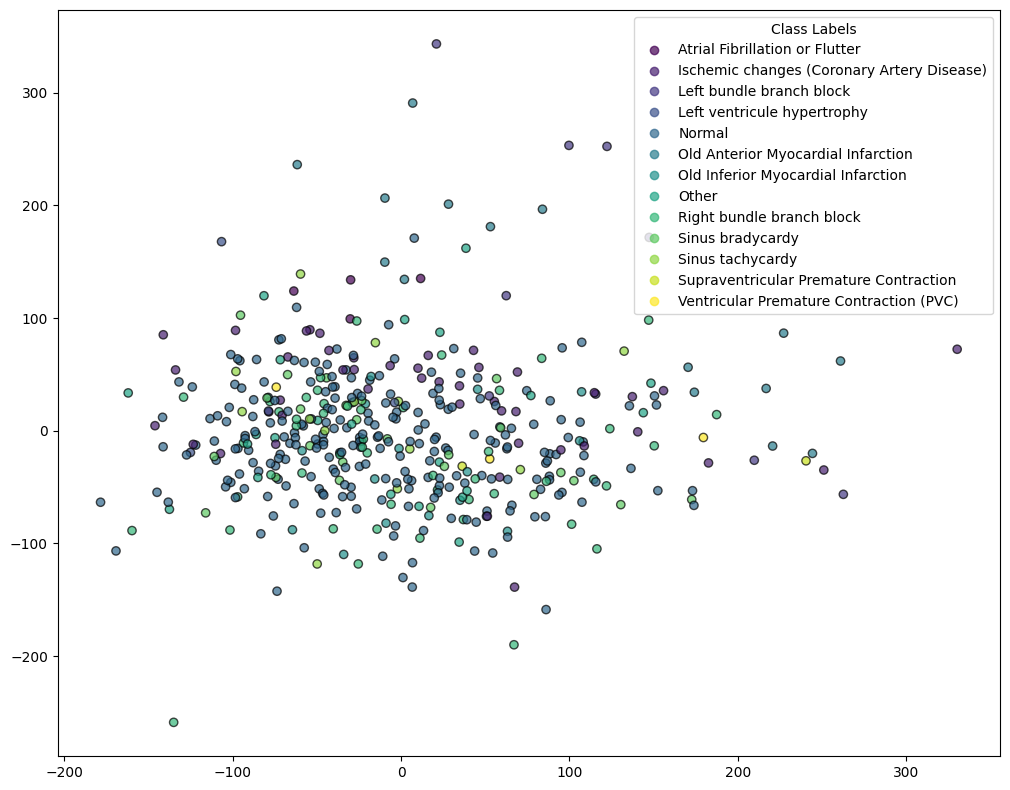

In [68]:
y_label_mapping = {1: "Normal", 2: "Ischemic changes (Coronary Artery Disease)", 3: "Old Anterior Myocardial Infarction", 4: "Old Inferior Myocardial Infarction", 5: "Sinus tachycardy", 6: "Sinus bradycardy", 7: "Ventricular Premature Contraction (PVC)", 8: "Supraventricular Premature Contraction", 9: "Left bundle branch block", 10: "Right bundle branch block", 11: "1. degree AtrioVentricular block", 12: "2. degree AV block", 13: "3. degree AV block", 14: "Left ventricule hypertrophy", 15: "Atrial Fibrillation or Flutter", 16: "Other"}
arrythmia_X_reduced = reduce_dimensions(arrythmia_X)
plot_data(X_data_reduced=arrythmia_X_reduced, Y_data=arrythmia_y, y_to_string_label=y_label_mapping)

### Base learners (n_estimators)

1.0
0.6029411764705882
[0.7630208333333334, 0.8463541666666666, 0.8541666666666666, 0.875, 0.8776041666666666, 0.890625, 0.8932291666666666]
[0.6029411764705882, 0.5588235294117647, 0.6029411764705882, 0.6176470588235294, 0.5882352941176471, 0.6176470588235294, 0.6176470588235294]


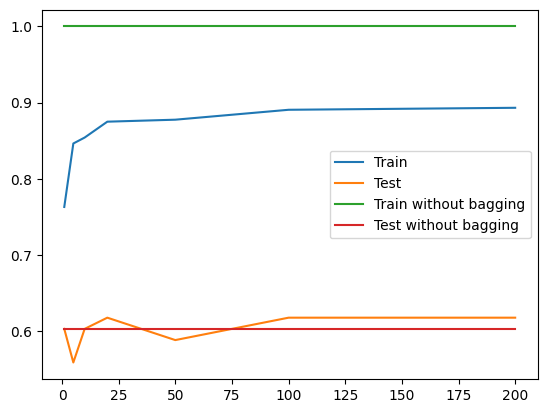

In [163]:
X_train, X_test, y_train, y_test = get_dataset_split('arrhythmia')

log_regr = LogisticRegression(penalty=None, max_iter=5000)
log_regr.fit(X_train, y_train)
nobag_tr_acc = log_regr.score(X_train, y_train)
nobag_te_acc = log_regr.score(X_test, y_test)
print(nobag_tr_acc)
print(nobag_te_acc)

list_tr_acc = []
list_te_acc = []
for n_models in list_n_models:
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, n_models, 0.5)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_n_models(list_n_models, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc)


### Fraction of examples used to train each base learners

1.0
0.6029411764705882
[0.6744791666666666, 0.8020833333333334, 0.8854166666666666, 0.9140625, 0.953125]
[0.5588235294117647, 0.5735294117647058, 0.6176470588235294, 0.6176470588235294, 0.6323529411764706]


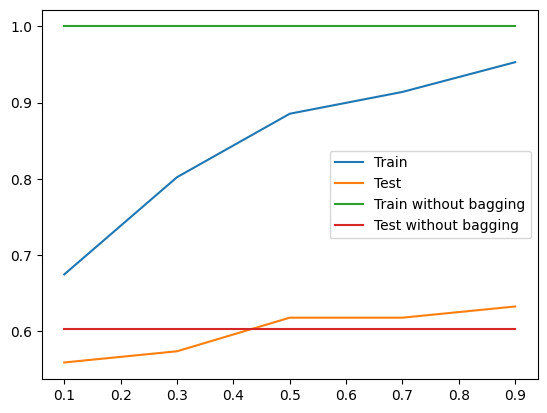

In [164]:
X_train, X_test, y_train, y_test = get_dataset_split('arrhythmia')

log_regr = LogisticRegression(penalty=None, max_iter=5000)
log_regr.fit(X_train, y_train)
nobag_tr_acc = log_regr.score(X_train, y_train)
nobag_te_acc = log_regr.score(X_test, y_test)
print(nobag_tr_acc)
print(nobag_te_acc)


list_tr_acc = []
list_te_acc = []
for n_examples in list_n_examples:
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, 10, n_examples)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_n_examples(list_n_examples, list_tr_acc, list_te_acc, nobag_tr_acc, nobag_te_acc)

### Regularization (C) parameter

[0.6588541666666666, 0.796875, 0.8359375, 0.9401041666666666, 0.9713541666666666, 0.9973958333333334, 1.0, 1.0]
[0.47058823529411764, 0.6323529411764706, 0.6617647058823529, 0.6617647058823529, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6323529411764706]
[0.5911458333333334, 0.7161458333333334, 0.7552083333333334, 0.828125, 0.8489583333333334, 0.8645833333333334, 0.8671875, 0.8802083333333334]
[0.4117647058823529, 0.5147058823529411, 0.5735294117647058, 0.6323529411764706, 0.6176470588235294, 0.6323529411764706, 0.6323529411764706, 0.6176470588235294]


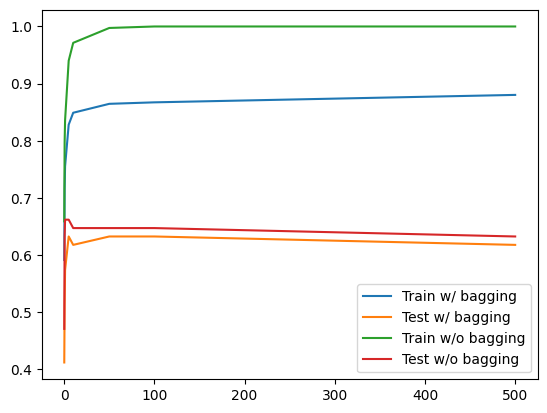

In [165]:
X_train, X_test, y_train, y_test = get_dataset_split('arrhythmia')

list_nobag_tr_acc = []
list_nobag_te_acc = []
list_tr_acc = []
list_te_acc = []
for C in list_C:
    log_regr = LogisticRegression(penalty='l2', C=C, max_iter=5000)
    log_regr.fit(X_train, y_train)
    list_nobag_tr_acc.append(log_regr.score(X_train, y_train))
    list_nobag_te_acc.append(log_regr.score(X_test, y_test))
    tr_acc, te_acc = bagging_log_regr(X_train, X_test, y_train, y_test, 10, 0.5, regularization=C)
    list_tr_acc.append(tr_acc)
    list_te_acc.append(te_acc)
print(list_nobag_tr_acc)
print(list_nobag_te_acc)
print(list_tr_acc)
print(list_te_acc)
plot_acc_vs_C(list_C, list_tr_acc, list_te_acc, list_nobag_tr_acc, list_nobag_te_acc)

# Darwin Dataset experiments

Setup logistic regression model without bagging

In [166]:
darwin_log_regr = LogisticRegression(penalty=None, max_iter=5000)
darwin_log_regr.fit(darwin_data_x_train, darwin_data_y_train)
darwin_nobag_tr_acc = darwin_log_regr.score(darwin_data_x_train, darwin_data_y_train)
darwin_nobag_te_acc = darwin_log_regr.score(darwin_data_x_test, darwin_data_y_test)
print(f"Train accuracy: {darwin_nobag_tr_acc}\nTest Accuracy: {darwin_nobag_te_acc}")

Train accuracy: 1.0
Test Accuracy: 0.8888888888888888


Now we will use bagging to train the logistic regression model while running several experiments of hyperparameter tuning.

## N_estimators (aka number of base learners)

Train Accuracy:
[0.9047619047619048, 0.9319727891156463, 0.9455782312925171, 0.9523809523809523, 0.9591836734693877, 0.9523809523809523, 0.9387755102040817]
Test Accuracy:
[0.9259259259259259, 0.8888888888888888, 0.8888888888888888, 0.9259259259259259, 0.8888888888888888, 0.8518518518518519, 0.8888888888888888]


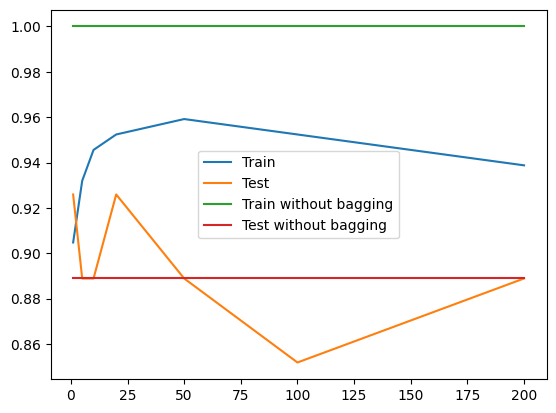

In [167]:
N_estimators_train_acc = []
N_estimators_test_acc = []
for estimator in list_n_models:
    tr_acc, te_acc = bagging_log_regr(darwin_data_x_train, darwin_data_x_test, darwin_data_y_train, darwin_data_y_test, estimator, 0.5)
    N_estimators_train_acc.append(tr_acc)
    N_estimators_test_acc.append(te_acc)
print(f"Train Accuracy:\n{N_estimators_train_acc}")
print(f"Test Accuracy:\n{N_estimators_test_acc}")

plot_acc_vs_n_models(list_n_models, N_estimators_train_acc, N_estimators_test_acc, darwin_nobag_tr_acc, darwin_nobag_te_acc)

## Testing fractional max_samples

Train Accuracy:
[0.8503401360544217, 0.9115646258503401, 0.9387755102040817, 0.9795918367346939, 0.9591836734693877]
Test Accuracy:
[0.8888888888888888, 0.9259259259259259, 0.8888888888888888, 0.8518518518518519, 0.8888888888888888]


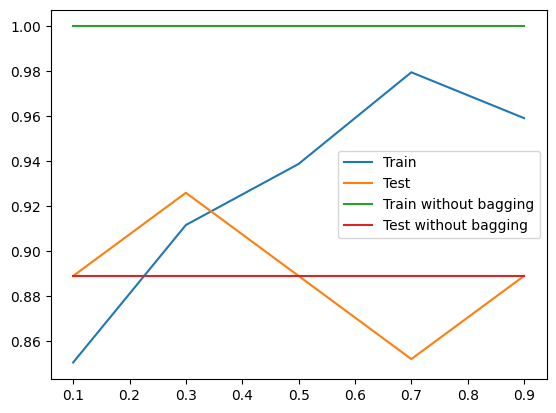

In [168]:
frac_max_samples_train_acc = []
frac_max_samples_test_acc = []
for n_examples in list_n_examples:
    tr_acc, te_acc = bagging_log_regr(darwin_data_x_train, darwin_data_x_test, darwin_data_y_train, darwin_data_y_test, 10, n_examples)
    frac_max_samples_train_acc.append(tr_acc)
    frac_max_samples_test_acc.append(te_acc)

print(f"Train Accuracy:\n{frac_max_samples_train_acc}")
print(f"Test Accuracy:\n{frac_max_samples_test_acc}")
plot_acc_vs_n_examples(list_n_examples, frac_max_samples_train_acc, frac_max_samples_test_acc, darwin_nobag_tr_acc, darwin_nobag_te_acc)

## Testing regularization parameter

Regularized Train Accuracy:
[0.9251700680272109, 0.9931972789115646, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Regulaized Test Accuracy:
[0.8888888888888888, 0.8518518518518519, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]
Regularized Train Accuracy with Bagging:
[0.8707482993197279, 0.9387755102040817, 0.9727891156462585, 0.9455782312925171, 0.9251700680272109, 0.9523809523809523, 0.9523809523809523, 0.9251700680272109]\Regularized Test Accuracy with Bagging:
[0.8888888888888888, 0.8518518518518519, 0.8518518518518519, 0.8888888888888888, 0.8888888888888888, 0.8518518518518519, 0.8888888888888888, 0.8888888888888888]


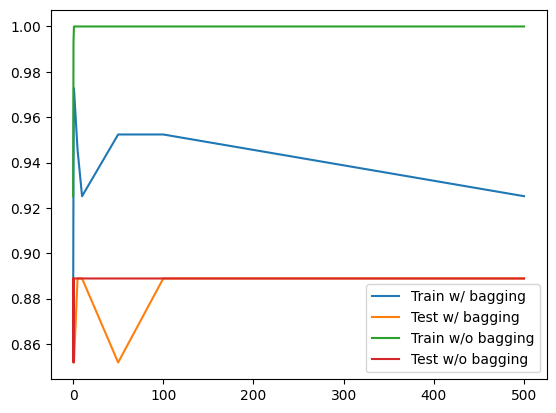

In [169]:
darwin_regularized_train_acc = []
darwin_regularized_test_acc = []
darwin_regularized_train_acc_bag = [] 
darwin_regularized_test_acc_bag = []
for c in list_C:
    cur_log_regr = LogisticRegression(penalty='l2', C=c, max_iter=5000)
    cur_log_regr.fit(darwin_data_x_train, darwin_data_y_train)
    darwin_regularized_train_acc.append(cur_log_regr.score(darwin_data_x_train, darwin_data_y_train))
    darwin_regularized_test_acc.append(cur_log_regr.score(darwin_data_x_test, darwin_data_y_test))
    cur_tr_acc_bag, cur_te_acc_bag = bagging_log_regr(darwin_data_x_train, darwin_data_x_test, darwin_data_y_train, darwin_data_y_test, 10, 0.5, regularization=c)
    darwin_regularized_train_acc_bag.append(cur_tr_acc_bag)
    darwin_regularized_test_acc_bag.append(cur_te_acc_bag)
print(f"Regularized Train Accuracy:\n{darwin_regularized_train_acc}\nRegulaized Test Accuracy:\n{darwin_regularized_test_acc}\nRegularized Train Accuracy with Bagging:\n{darwin_regularized_train_acc_bag}\Regularized Test Accuracy with Bagging:\n{darwin_regularized_test_acc_bag}")
plot_acc_vs_C(list_C, darwin_regularized_train_acc_bag, darwin_regularized_test_acc_bag, darwin_regularized_train_acc, darwin_regularized_test_acc)

In [170]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(darwin_data_x_train, darwin_data_y_train)

ValueError: could not convert string to float: 'P'